In [1]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib

HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


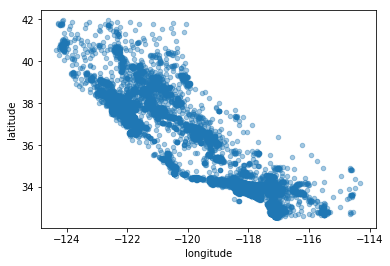

In [4]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)


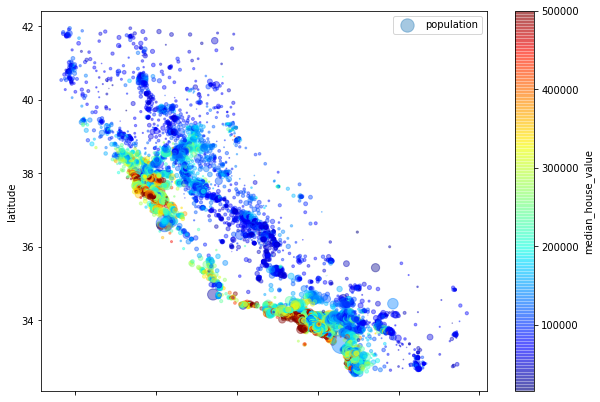

In [5]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [7]:
# import numpy as np
# import matplotlib.image as mpimg
# california_img=mpimg.imread('california.png')
# ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
#                        s=housing['population']/100, label="Population",
#                        c="median_house_value", cmap=plt.get_cmap("jet"),
#                        colorbar=False, alpha=0.4,
#                       )
# plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
# plt.ylabel("Latitude", fontsize=14)
# plt.xlabel("Longitude", fontsize=14)

# prices = housing["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar()
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

# plt.legend(fontsize=16)
# plt.show()

In [55]:

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df.head()

# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ go.Scattergeo(
        locationmode = 'country names',
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
#             cmin = 0,
#             color = df['cnt'],
#             cmax = df['cnt'].max(),
            colorbar=dict(
                title="Incoming flights<br>February 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)', 
        geo = dict(
            scope='south america',
#             projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )
iplot(fig)

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df.head()

df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)


In [22]:
coords = {
            "AC": [ -8.77, -70.55]
          , "AL": [ -9.71, -35.73]
          , "AM": [ -3.07, -61.66]
          , "AP": [  1.41, -51.77]
          , "BA": [-12.96, -38.51]
          , "CE": [ -3.71, -38.54]
          , 'DF': [-15.83, -47.86]
          , "ES": [-19.19, -40.34]
          , "GO": [-16.64, -49.31]
          , "MA": [ -2.55, -44.30]
          , "MT": [-12.64, -55.42]
          , "MS": [-20.51, -54.54]
          , "MG": [-18.10, -44.38]
          , "PA": [ -5.53, -52.29]
          , "PB": [ -7.06, -35.55]
          , "PR": [-24.89, -51.55]
          , "PE": [ -8.28, -35.07]
          , "PI": [ -8.28, -43.68]
          , "RJ": [-22.84, -43.15]
          , "RN": [ -5.22, -36.52]
          , "RO": [-11.22, -62.80]
          , "RS": [-30.01, -51.22]
          , "RR": [  1.89, -61.22]
          , "SC": [-27.33, -49.44]
          , "SE": [-10.90, -37.07]
          , "SP": [-23.55, -46.64]
          , "TO": [-10.25, -48.25]
        }

In [50]:
df = pd.DataFrame(coords).T

In [51]:
df = df.reset_index()

In [52]:
df.columns = ['text', 'long', 'lat']

In [56]:
df.head()

,text,long,lat
0,AC,-8.77,-70.55
1,AL,-9.71,-35.73
2,AM,-3.07,-61.66
3,AP,1.41,-51.77
4,BA,-12.96,-38.51


In [57]:
token = 'pk.eyJ1IjoibHNhd2FrdWNoaSIsImEiOiJjanR5bzBjcDIydm40NGVtdTZlcndvczVnIn0.eqn_62MmRZiQZhCymBEq_w'

In [60]:
shaz13_custom_style = "mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"
#set the geo=spatial data
data = [go.Scattermapbox(
            lat= df['lat'] ,
            lon= df['long'],
#             customdata = train['key'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'gold',
                opacity = .8,
            ),
          )]

In [65]:
#set the layout to plot
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken=token,
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(lat=40.721319,
                                             lon=-73.987130),
                                style=shaz13_custom_style),
                    width=900,
                    height=600, 
                    title = "Pick up Locations in NewYork")

In [66]:
fig = dict(data=data, layout=layout)
iplot(fig)

In [68]:
df_uf = df.copy()

In [1]:

import plotly.graph_objs as go

import pandas as pd

# mapbox_access_token = 'ADD_YOUR_TOKEN_HERE'

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
# site_lat = df.lat
# site_lon = df.lon
# locations_name = df.text
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df_uf.lat
site_lon = df_uf.long
locations_name = df_uf.text

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]
        
layout = go.Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=go.layout.Mapbox(
        accesstoken=token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=-16.64,
            lon=-50.31
        ),
        pitch=0,
        zoom=2,
        style='light'
    ),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Nuclear Waste Sites on American Campuses')

NameError: name 'df_uf' is not defined

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df.lat
site_lon = df.lon
locations_name = df.text
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')

In [78]:
df.head()

,lat,lon,text
0,35.888827,-106.305022,Acid/Pueblo Canyon
1,39.503487,-84.743859,Alba Craft Shop
2,44.620822,-123.120917,"""Albany, Oregon, FUSRAP Site"""
3,40.641371,-80.242936,Aliquippa Forge
4,39.361063,-84.540750,Associated Aircraft Tool and Manufacturing Co.


In [79]:
df_uf.head()

,text,long,lat
0,AC,-8.77,-70.55
1,AL,-9.71,-35.73
2,AM,-3.07,-61.66
3,AP,1.41,-51.77
4,BA,-12.96,-38.51


In [92]:
df_uf.long

0     -8.77
1     -9.71
2     -3.07
3      1.41
4    -12.96
5     -3.71
6    -15.83
7    -19.19
8    -16.64
9     -2.55
10   -12.64
11   -20.51
12   -18.10
13    -5.53
14    -7.06
15   -24.89
16    -8.28
17    -8.28
18   -22.84
19    -5.22
20   -11.22
21   -30.01
22     1.89
23   -27.33
24   -10.90
25   -23.55
26   -10.25
Name: long, dtype: float64

In [27]:
df.columns = ['lon', 'lat']

In [29]:
df.reset_index()

,index,lon,lat
0,AC,-8.77,-70.55
1,AL,-9.71,-35.73
2,AM,-3.07,-61.66
3,AP,1.41,-51.77
4,BA,-12.96,-38.51
5,CE,-3.71,-38.54
6,DF,-15.83,-47.86
7,ES,-19.19,-40.34
8,GO,-16.64,-49.31
9,MA,-2.55,-44.30
